# Goal is to Engineer Gyroscope features that can predict activity type 

In [ ]:
library(sqldf)

In [6]:
glasses <- read.csv("glasses.csv")

In [3]:
report <- read.csv("report.csv")

In [8]:
smartphone <- read.csv("smartphone.csv")
smartwatch <- read.csv("smartwatch.csv")

In [60]:
#explore main features in both datasets
print("smartphone features")
unique(smartphone$source)
print("smartwatch features")
unique(smartwatch$source)

[1] "smartphone features"


[1] step_detector       battery             activity           
 [4] audio               orientation         accelerometer      
 [7] gyroscope           magnetometer        pressure           
[10] light               gravity             linear_acceleration
[13] rotationVector      wifi                proximity          
[16] bluetooth           step_counter       
17 Levels: accelerometer activity audio battery bluetooth gravity ... wifi

[1] "smartwatch features"


[1] battery             accelerometer       gravity            
 [4] linear_acceleration gyroscope           pressure           
 [7] orientation         magnetometer        rotation_vector    
[10] heart_rate          step_counter        step_detector      
12 Levels: accelerometer battery gravity gyroscope ... step_detector

# Joining Report and SmartWatch

In [61]:
#Convert to and from into characters for smartwatch, explore data types
#We will focus on smartwatch for now
colnames(report)
colnames(smartwatch)

typeof(report$from)
typeof(report$to)
typeof(smartwatch$timestamp)

report$from <- as.character(report$from)
report$to <- as.character(report$to)
smartwatch$timestamp <- as.character(smartwatch$timestamp)

head(report$from)
head(report$to)

typeof(smartwatch$timestamp)

[1] "index"         "activity_type" "duration"      "from"         
[5] "to"            "comment"       "from_long"     "to_long"      
[9] "diff"

[1] "index"           "source"          "timestamp"       "values"         
[5] "timestamp_short"

[1] "character"

[1] "character"

[1] "character"

[1] "2017-07-01 21:34" "2017-07-01 21:29" "2017-07-01 21:13" "2017-07-01 21:08"
[5] "2017-07-01 20:49" "2017-07-01 18:26"

[1] "2017-07-01 23:17" "2017-07-01 21:32" "2017-07-02 10:49" "2017-07-01 21:13"
[5] "2017-07-01 21:07" "2017-07-01 18:46"

[1] "character"

In [63]:
#Standardize timestamp formats between smartwatch and report
smartwatch$timestamp[100000]
report$from[13]
smartwatch$timestamp[1] < '2017-06-29 07:45:56.264'

smartwatch$timestamp[1] < report$from[1]
smartwatch$timestamp_short <- substr(smartwatch$timestamp, 1, 19)
smartwatch$timestamp_short[1]

[1] "2017-07-07 11:02:54.807"

[1] "2017-07-02 19:03"

[1] TRUE

[1] TRUE

[1] "2017-06-29 07:45:56"

In [72]:
report$from_long <- paste0(report$from, ":00")
report$to_long <- paste0(report$to, ":00")

report$from_long[1]
report$to_long[1]
smartwatch$timestamp_long[1]

#Create duration feature for report
report$duration <- as.character(as.POSIXct(report$to) - as.POSIXct(report$from))

head(report)
head(smartwatch)
head(smartphone)

[1] "2017-07-01 21:34:00"

[1] "2017-07-01 23:17:00"

NULL

index,activity_type,duration,from,to,comment,from_long,to_long,diff,duration_in_s
0,Video games,103,2017-07-01 21:34,2017-07-01 23:17,,2017-07-01 21:34:00,2017-07-01 23:17:00,103,103
1,In computer,3,2017-07-01 21:29,2017-07-01 21:32,,2017-07-01 21:29:00,2017-07-01 21:32:00,3,3
2,At home,816,2017-07-01 21:13,2017-07-02 10:49,,2017-07-01 21:13:00,2017-07-02 10:49:00,816,816
3,In computer,5,2017-07-01 21:08,2017-07-01 21:13,,2017-07-01 21:08:00,2017-07-01 21:13:00,5,5
4,Eat,18,2017-07-01 20:49,2017-07-01 21:07,,2017-07-01 20:49:00,2017-07-01 21:07:00,18,18
5,In computer,20,2017-07-01 18:26,2017-07-01 18:46,,2017-07-01 18:26:00,2017-07-01 18:46:00,20,20


index,source,timestamp,values,timestamp_short
164349,battery,2017-06-29 07:45:56.262,['98'],2017-06-29 07:45:56
164350,accelerometer,2017-06-29 07:46:01.263,"['-0.3440857', '0.68330383', '9.967361']",2017-06-29 07:46:01
164351,gravity,2017-06-29 07:46:01.324,"['-0.34131828', '0.6573288', '9.778641']",2017-06-29 07:46:01
164352,linear_acceleration,2017-06-29 07:46:01.329,"['-0.018068999', '0.034808993', '-0.033065796']",2017-06-29 07:46:01
164353,gyroscope,2017-06-29 07:46:01.402,"['0.0041656494', '-0.0132751465', '0.006164551']",2017-06-29 07:46:01
164354,pressure,2017-06-29 07:46:01.464,['969.3651'],2017-06-29 07:46:01


index,source,timestamp,values
1316828,step_detector,2017-06-29 07:45:16.506,['1.0']
1316829,battery,2017-06-29 07:45:16.514,['100']
1316830,activity,2017-06-29 07:45:16.579,['STILL: 100']
1316831,audio,2017-06-29 07:45:17.407,"['0.0', '0.0', '0.0', '32767.0']"
1316832,audio,2017-06-29 07:45:18.407,"['227.0', '113.5', '227.0', '227.0']"
1316833,activity,2017-06-29 07:45:18.767,['STILL: 100']


In [73]:
#Join report with smartwatch
typeof(smartwatch$timestamp_short)
typeof(report$from_long)
typeof(report$to_long)

test_1 <- sqldf('SELECT A.*, B.`index` as eventID, B.`from`, B.`to`, B.duration, B.activity_type
     from smartwatch as A
     inner join report as B
     on (A.timestamp >= B.`from` and A.timestamp <= B.`to_long`)')

[1] "character"

[1] "character"

[1] "character"

# Gyroscope Duration exploration

[1] 115460

[1] orientation         magnetometer        battery            
 [4] pressure            gravity             linear_acceleration
 [7] rotation_vector     accelerometer       gyroscope          
[10] heart_rate          step_detector       step_counter       
12 Levels: accelerometer battery gravity gyroscope ... step_detector

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


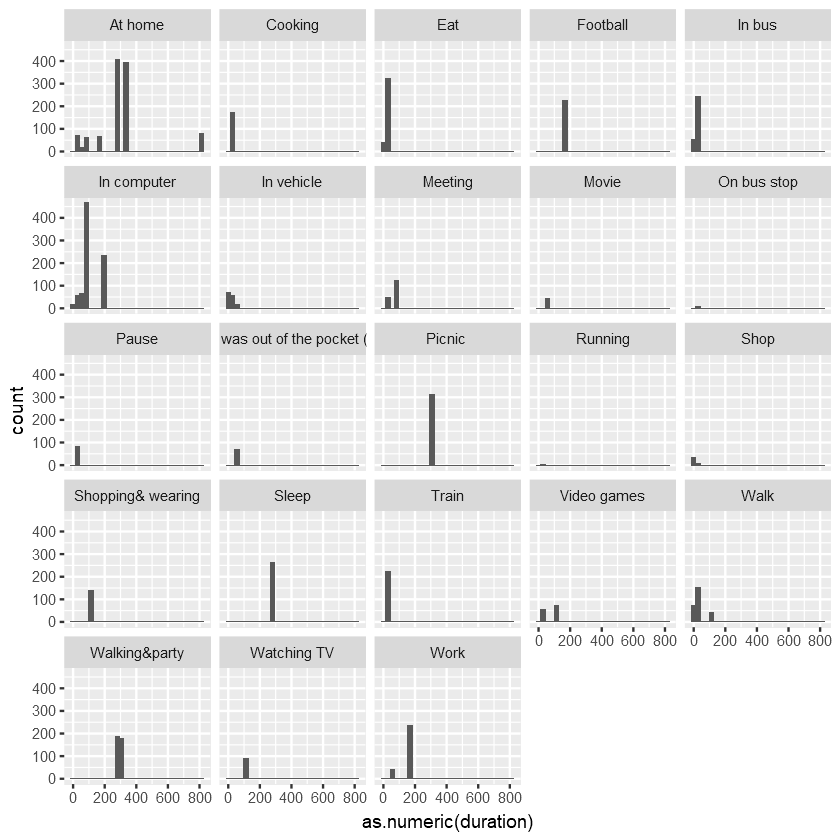

In [80]:
#Explore gyroscope features
nrow(test_1)

unique(test_1_ID2$source)
test_1_gyro <- subset(test_1, source == 'gyroscope')

#Plot durations distributions for all events
ggplot(test_1_gyro,aes(x=as.numeric(duration))) + geom_histogram()+facet_wrap(~activity_type)

In [138]:
library(dplyr)
#Engineer gyroscope features
test_1_gyro$char <- as.character(test_1_gyro$values)

gyro_xyz <- strsplit(test_1_gyro$char, "\',", fixed=TRUE)
typeof(gyro_xyz)

[1] "list"

In [139]:
head(gyro_xyz, n=15)

print("Strings")
gyro_xyz[[1]]

print("x y and z seperate")
gyro_xyz[[1]][1]
gyro_xyz[[1]][2]
gyro_xyz[[1]][3]

print("Post Pruning")
as.numeric(substr(gyro_xyz[[1]][[1]], 3, nchar(gyro_xyz[[1]][[1]])))
as.numeric(substr(gyro_xyz[[1]][[2]], 3, nchar(gyro_xyz[[1]][[2]])))
as.numeric(substr(gyro_xyz[[1]][[3]], 3, nchar(gyro_xyz[[1]][[3]])-2))

for(i in seq_along(gyro_xyz)){
    gyro_xyz[[i]][[1]]<-as.numeric(substr(gyro_xyz[[i]][[1]], 3, nchar(gyro_xyz[[i]][[1]])))
    gyro_xyz[[i]][[2]]<-as.numeric(substr(gyro_xyz[[i]][[2]], 3, nchar(gyro_xyz[[i]][[2]])))
    gyro_xyz[[i]][[3]]<-as.numeric(substr(gyro_xyz[[i]][[3]], 3, nchar(gyro_xyz[[i]][[3]])-2))
}

typeof(gyro_xyz[[1]][[1]])

[[1]]
[1] "['-0.3515625"  " '0.68681335"  " '0.4768982']"

[[2]]
[1] "['-0.08087158"   " '-0.014450073"  " '-0.21063232']"

[[3]]
[1] "['0.58576965"   " '-0.8377991"   " '-1.6647186']"

[[4]]
[1] "['0.55371094"  " '0.86172485"  " '2.2135925']"

[[5]]
[1] "['0.49180603"   " '-0.7094269"   " '-1.9339142']"

[[6]]
[1] "['-1.0274658"   " '0.7282562"    " '0.86624146']"

[[7]]
[1] "['-1.3852844"  " '1.3186188"   " '1.4363708']"

[[8]]
[1] "['-0.003112793" " '-0.31069946"  " '-1.348114']" 

[[9]]
[1] "['0.767395"    " '1.4823456"   " '3.1717987']"

[[10]]
[1] "['0.045791626"     " '0.023895264"     " '-0.0072784424']"

[[11]]
[1] "['0.94944763" " '-2.2355347" " '2.74292']" 

[[12]]
[1] "['1.2572021"    " '-0.6462555"   " '-0.8005676']"

[[13]]
[1] "['-0.27667236" " '0.45085144"  " '0.8242798']"

[[14]]
[1] "['0.8366394"    " '-1.401001"    " '-1.5920715']"

[[15]]
[1] "['-0.32269287"  " '-0.57818604"  " '-2.6925812']"

[1] "Strings"


[1] "['-0.3515625"  " '0.68681335"  " '0.4768982']"

[1] "x y and z seperate"


[1] "['-0.3515625"

[1] " '0.68681335"

[1] " '0.4768982']"

[1] "Post Pruning"


[1] -0.3515625

[1] 0.6868133

[1] 0.4768982

[1] "character"

In [142]:
test_1_gyro$x <-as.numeric(gyro_xyz[[1]])
test_1_gyro$y <-as.numeric(gyro_xyz[[2]])
test_1_gyro$z <-as.numeric(gyro_xyz[[3]])

In [143]:
head(test_1_gyro)

,index,source,timestamp,values,timestamp_short,eventID,from,to,duration,activity_type,char,x,y,z
3,169367,gyroscope,2017-06-29 09:57:08.396,"['-0.3515625', '0.68681335', '0.4768982']",2017-06-29 09:57:08,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['-0.3515625', '0.68681335', '0.4768982']",-0.3515625,-0.08087158,0.5857697
17,169381,gyroscope,2017-06-29 09:57:13.465,"['-0.08087158', '-0.014450073', '-0.21063232']",2017-06-29 09:57:13,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['-0.08087158', '-0.014450073', '-0.21063232']",0.6868133,-0.01445007,-0.8377991
34,169398,gyroscope,2017-06-29 09:57:18.586,"['0.58576965', '-0.8377991', '-1.6647186']",2017-06-29 09:57:18,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['0.58576965', '-0.8377991', '-1.6647186']",0.4768982,-0.21063232,-1.6647186
56,169420,gyroscope,2017-06-29 09:57:24.137,"['0.55371094', '0.86172485', '2.2135925']",2017-06-29 09:57:24,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['0.55371094', '0.86172485', '2.2135925']",-0.3515625,-0.08087158,0.5857697
73,169437,gyroscope,2017-06-29 09:57:29.282,"['0.49180603', '-0.7094269', '-1.9339142']",2017-06-29 09:57:29,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['0.49180603', '-0.7094269', '-1.9339142']",0.6868133,-0.01445007,-0.8377991
94,169458,gyroscope,2017-06-29 09:57:57.001,"['-1.0274658', '0.7282562', '0.86624146']",2017-06-29 09:57:57,12,2017-06-29 09:57,2017-06-29 10:17,20,Eat,"['-1.0274658', '0.7282562', '0.86624146']",0.4768982,-0.21063232,-1.6647186


# Engineered features by activity type

In [169]:
#Write csv for excel analysis as well
write.csv(test_1_gyro, "test_1_gyro.csv")

library(plyr)
#aggregate mean
gyro_mean <- ddply(select(test_1_gyro, activity_type, x, y, z, eventID), .(activity_type, eventID), colwise(mean))

#aggregate standard deviation
gyro_std <- ddply(select(test_1_gyro, activity_type, x, y, z, eventID), .(activity_type, eventID), colwise(sd))
gyro_duration <- ddply(test_1_gyro, .(activity_type, eventID),nrow)


#aggregate percent more than 2 standard deviation
#gyro_mean$lower_x <- gyro_mean$x - gyro_std$x*2
#gyro_mean$upper_x <- gyro_mean$x + gyro_std$x*2

#compute_perc_upper <- function(x, LB, UP) count(x<LB || x > UP)

In [190]:
head(gyro_mean)
head(gyro_std)
names(gyro_std) <-c("activity_type", "eventID, x_sd", "y_sd", "z_sd")
head(gyro_duration)
names(gyro_duration) <-c("activity_type", "eventID", "duration")
#lets see if we can use a decision tree to predict activity based on gyroscope features

activity_type,eventID,x,y,z
At home,1,0.2707163,-0.1019847,-0.6389160
At home,2,0.2816335,-0.1023551,-0.6604017
At home,5,0.2361426,-0.1010316,-0.5722147
At home,9,0.2379648,-0.1008734,-0.5744589
At home,10,0.2707163,-0.1019847,-0.6389160
At home,11,0.2766606,-0.1007342,-0.6417572


activity_type,"eventID, x_sd",y_sd,z_sd,NA
At home,1,0.4498833,0.08176106,0.9327723
At home,2,0.4457966,0.08237494,0.9258985
At home,5,0.4586495,0.07945407,0.9474096
At home,9,0.4704680,0.08161447,0.9709960
At home,10,0.4492461,0.08164525,0.9314511
At home,11,0.4510354,0.08213965,0.9297626


activity_type,eventID,duration
At home,1,141
At home,2,171
At home,5,462
At home,9,19
At home,10,234
At home,11,70


In [210]:
AllFeatures<-cbind(gyro_mean,gyro_std[,2:5] ,gyro_duration[,3])
names(AllFeatures) <- c("activity","type", "eventID", "x", "y", "z", "x_std", "y_std", "z_std", "duration")

In [211]:
head(AllFeatures)

activity,type,eventID,x,y,z,x_std,y_std,z_std,duration
At home,1,0.2707163,-0.1019847,-0.6389160,1,0.4498833,0.08176106,0.9327723,141
At home,2,0.2816335,-0.1023551,-0.6604017,2,0.4457966,0.08237494,0.9258985,171
At home,5,0.2361426,-0.1010316,-0.5722147,5,0.4586495,0.07945407,0.9474096,462
At home,9,0.2379648,-0.1008734,-0.5744589,9,0.4704680,0.08161447,0.9709960,19
At home,10,0.2707163,-0.1019847,-0.6389160,10,0.4492461,0.08164525,0.9314511,234
At home,11,0.2766606,-0.1007342,-0.6417572,11,0.4510354,0.08213965,0.9297626,70


In [214]:
write.csv(AllFeatures, "AllFeatures.csv")